# Задача 1. Разведочный анализ

* **Дедлайн**: 08.10.2023, 23:59
* **Основной полный балл**: 5
* **Максимум баллов**: 10

## Задача

- [+] Самостоятельно скачать данные (из открытых источников по интересующей тематике, на сайте [kaggle](https://www.kaggle.com), [UCI](https://archive.ics.uci.edu/ml/datasets.php) репозитория, [Google Dataset Search](https://datasetsearch.research.google.com/) и др.). Для полного балла нужно выбрать данные, в которых есть пропущенные значения.
- [+] Считать данные и вывести их основные характеристики, описание признаков.
- [+] Сформулировать задачу предсказания, какой признак интересно было бы предсказывать по остальным.
- [+] * (+2 балла) Произвести чистку данных (**Data Cleaning**). Например, заполнить пропущенные значения чем то осмысленным для поставленной задачи.
- [+] Провести анализ признаков, используя визуализацию (**hist(), boxplot(), countplot(), barplot()** и тд), сделать выводы, которые могут быть полезны при дальнейшем решении задачи предсказания.
- [+] * (+1 балл) Оценить зависимость между признаками (визуализация или построение матрицы корреляции).
- [+] * (+2 балла) Выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные если это нужно), убрать ненужные признаки, создать новые (**Feature Engineering**).


In [10]:
%matplotlib inline
from matplotlib import pyplot as plt
from bs4 import BeautifulSoup
import seaborn as sns
import pandas as pd
import numpy as np
import requests
import time
import re

# Считываем данные и выводим их основные характеристики, описание признаков.
## Данные

* `Type` - содержит информацию о типе квартиры `int`. Где:
  - 0 = студия
  - 1 = 1-комнатная
  - 2 = 2-комнатная
  - ...
  - 8 = 8-комнатная
* `Square` - содержит информацию о жилой площади `float`
* `Floor` - содержит информацию о этаже, на котором распологается квартира `int`
* `Metro` - содержит информацию о наличии метро `int`. Где:
  - 0 = метро отсутствует
  - 1 = есть метро
* `Price` - содержит информацию о цене новостройки в рублях `int`

Было бы интересно предсказывать цену квартиры в Питербурге исходя из других параметров, что бы рекомендовать к покупке ту или иную квартиру

In [17]:
apartment_df = pd.read_csv('../data/apartment_price/modified_apartment.csv')
apartment_df.head()

,Type,Square,Floor,Metro,Price
0,NaN,NaN,9,NaN,NaN
1,1.0,30.62,3,1.0,9399999.0
2,1.0,45.69,3,1.0,13900000.0
3,1.0,34.84,11,1.0,6043914.0
4,3.0,65.77,1,1.0,11307171.0


In [18]:
apartment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6600 entries, 0 to 6599
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Type    6468 non-null   float64
 1   Square  6567 non-null   float64
 2   Floor   6600 non-null   int64  
 3   Metro   6585 non-null   float64
 4   Price   6556 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 257.9 KB


In [27]:
apartment_df.describe()

,Type,Square,Floor,Metro,Price
count,6468.000000,6567.000000,6600.000000,6585.000000,6.556000e+03
mean,1.144094,44.591768,9.555000,0.190129,7.724972e+06
std,0.870607,19.614868,5.308744,0.392433,1.041567e+07
min,0.000000,16.770000,1.000000,0.000000,2.500000e+06
25%,1.000000,32.530000,5.000000,0.000000,4.717174e+06
50%,1.000000,37.600000,9.000000,0.000000,5.698234e+06
75%,2.000000,55.610000,14.000000,0.000000,7.947608e+06
max,8.000000,521.400000,25.000000,1.000000,4.500000e+08


# Исследование (визуализация данных)

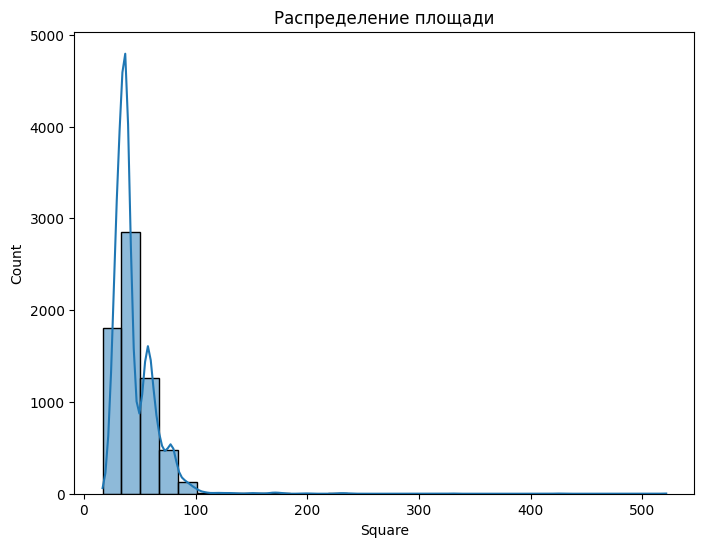

In [79]:
plt.figure(figsize=(8, 6))
sns.histplot(data=apartment_df, x='Square', bins=30, kde=True)
plt.title('Распределение площади')
plt.show()

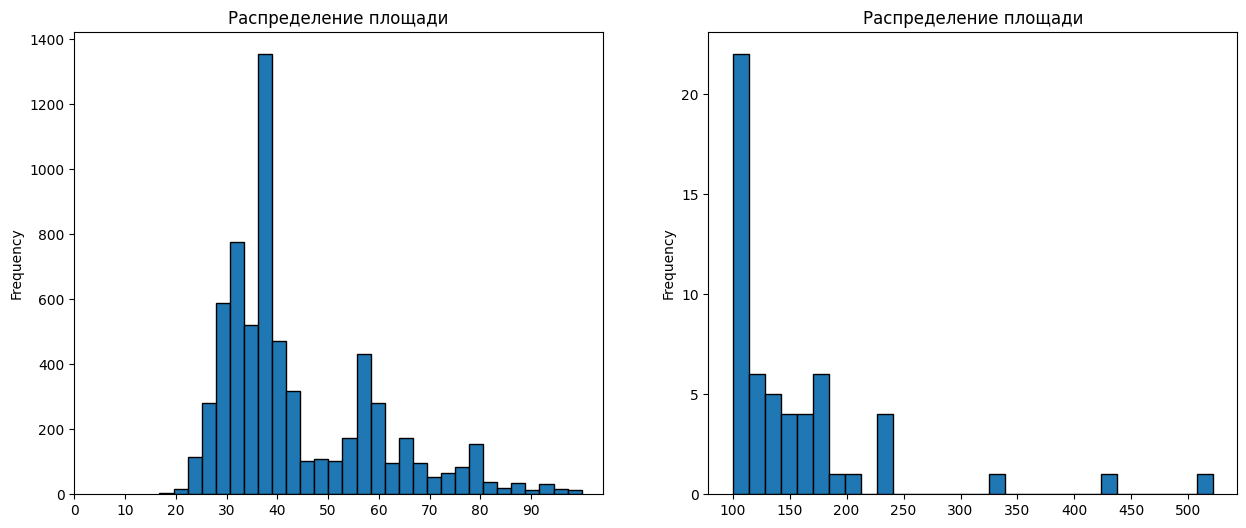

In [65]:
_, ax = plt.subplots(1, 2, figsize=(15, 6))
apartment_df[apartment_df['Square'] <= 100]['Square'].plot.hist(ax=ax[0], edgecolor='black', bins=30)
ax[0].set_title('Распределение площади')
x1 = list(range(0, 100, 10))
ax[0].set_xticks(x1)
apartment_df[apartment_df['Square'] >= 100]['Square'].plot.hist(ax=ax[1], edgecolor='black', bins=30)
ax[1].set_title('Распределение площади')
x1 = list(range(100, 550, 50))
ax[1].set_xticks(x1)

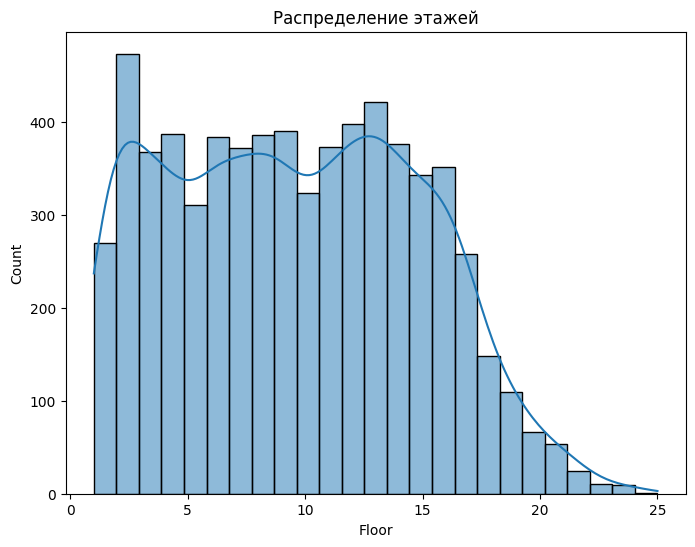

In [67]:
plt.figure(figsize=(8, 6))
sns.histplot(data=apartment_df, x='Floor', bins=25, kde=True)
plt.title('Распределение этажей')
plt.show()

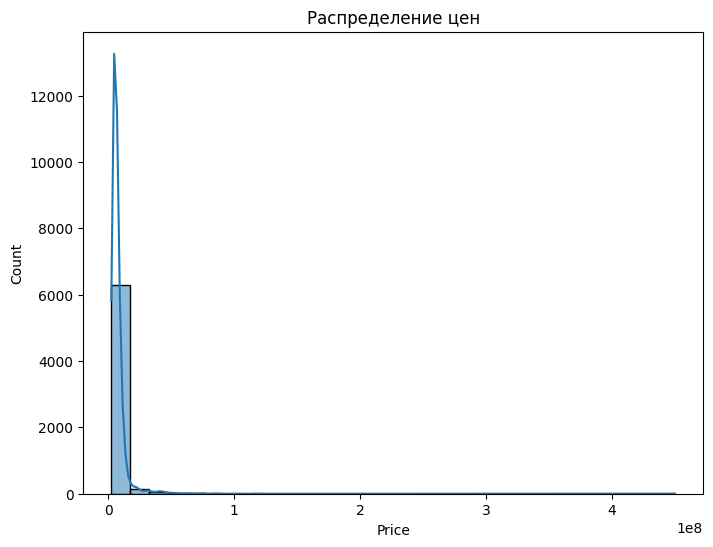

In [78]:
plt.figure(figsize=(8, 6))
sns.histplot(data=apartment_df, x='Price', bins=30, kde=True)
plt.title('Распределение цен')
plt.show()

Text(0.5, 1.0, 'Распределение аномальных цен ')

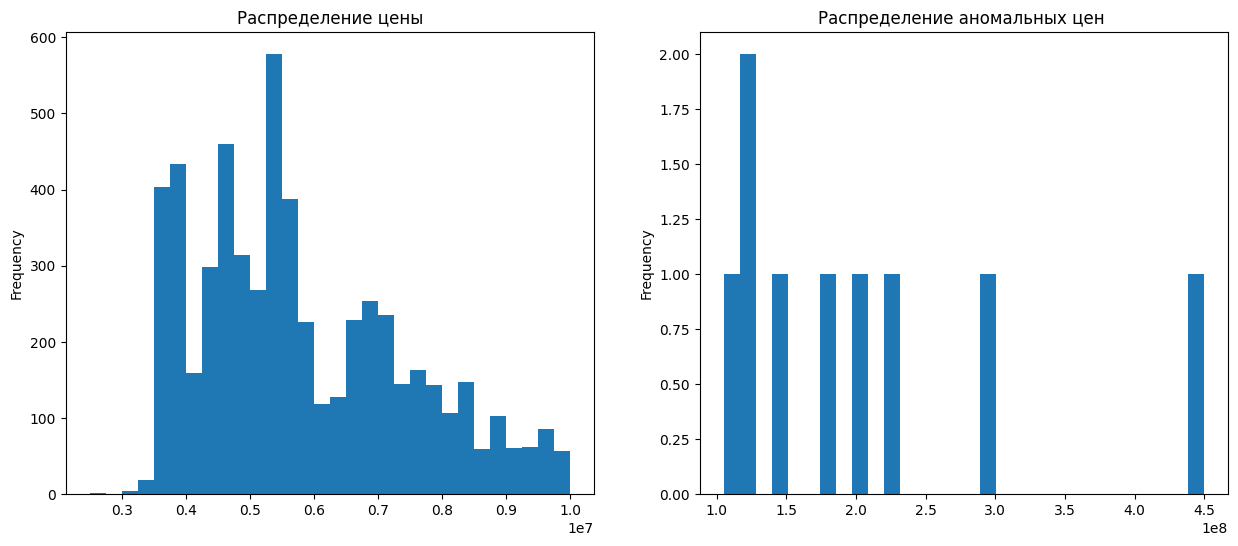

In [74]:
_, ax = plt.subplots(1, 2, figsize=(15, 6))
apartment_df[apartment_df['Price'] <= 5+1e7]['Price'].plot.hist(ax=ax[0], bins=30)
ax[0].set_title('Распределение цены')

apartment_df[apartment_df['Price'] >= 1+1e8]['Price'].plot.hist(ax=ax[1], bins=30)
ax[1].set_title('Распределение аномальных цен ')


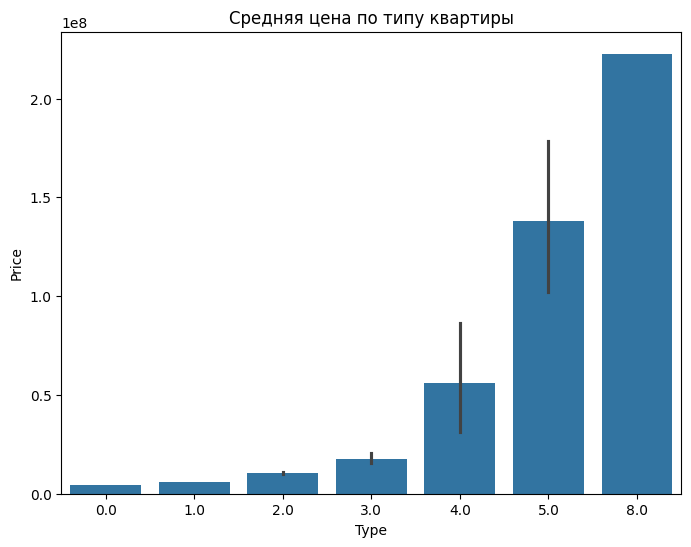

In [76]:
plt.figure(figsize=(8, 6))
sns.barplot(data=apartment_df, x='Type', y='Price')
plt.title('Средняя цена по типу квартиры')
plt.show()

Text(0.5, 1.0, 'Средняя цена по типу квартиры ')

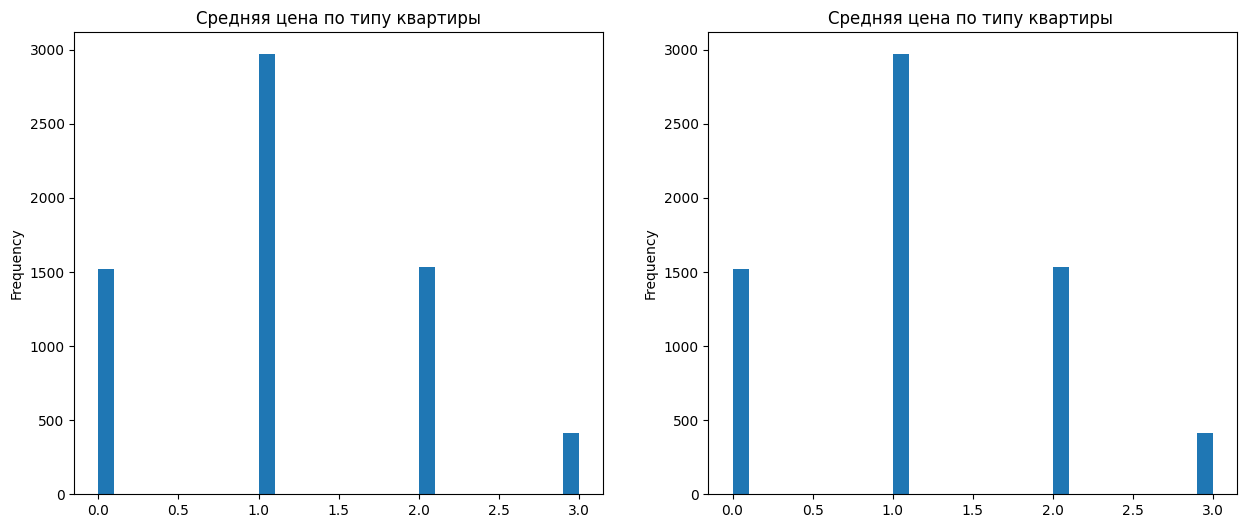

In [82]:
_, ax = plt.subplots(1, 2, figsize=(15, 6))
apartment_df[apartment_df['Type'] <= 3]['Type'].plot.hist(ax=ax[0], bins=30, x='Type', y='Price')
ax[0].set_title('Средняя цена по типу квартиры')

apartment_df[apartment_df['Type'] <= 3]['Type'].plot.hist(ax=ax[1], bins=30, x='Type', y='Price')
ax[1].set_title('Средняя цена по типу квартиры ')

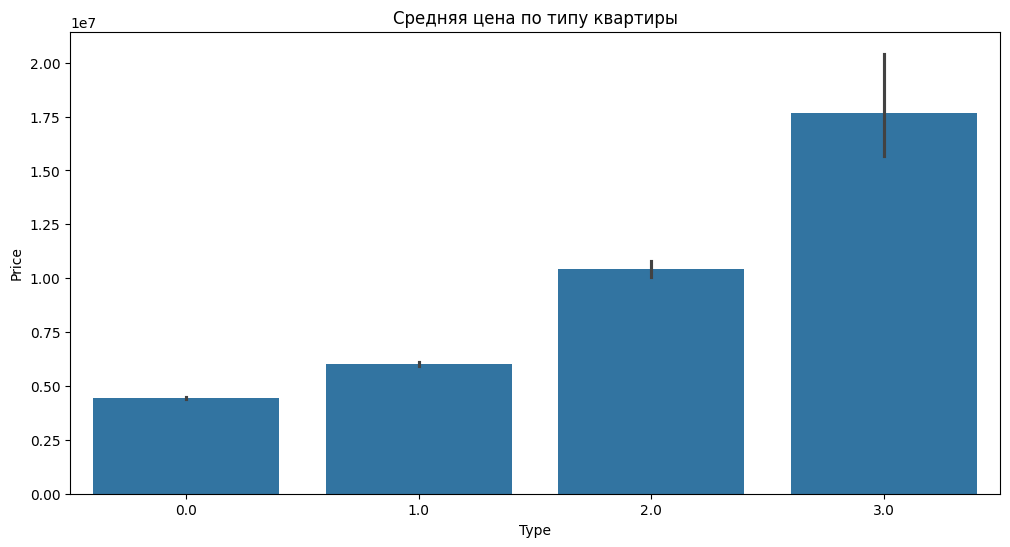

In [94]:
plt.figure(figsize=(12, 6))
sns.barplot(data=apartment_df[apartment_df['Type'] <= 3], x='Type', y='Price')
plt.title('Средняя цена по типу квартиры')
plt.show()

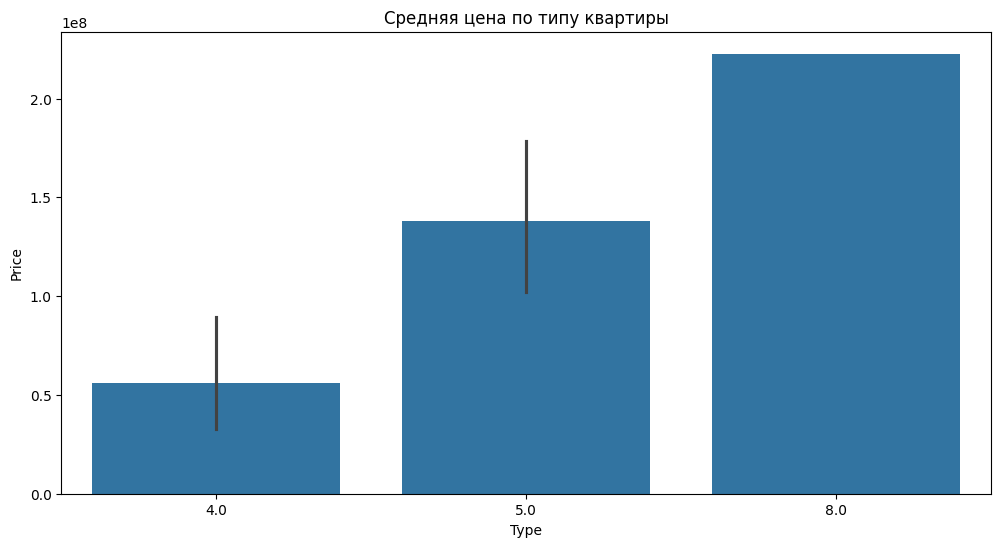

In [95]:
plt.figure(figsize=(12,6))
sns.barplot(data=apartment_df[apartment_df['Type'] > 3], x='Type', y='Price')
plt.title('Средняя цена по типу квартиры')
plt.show()

# Оценим зависимость между признаками

<Axes: >

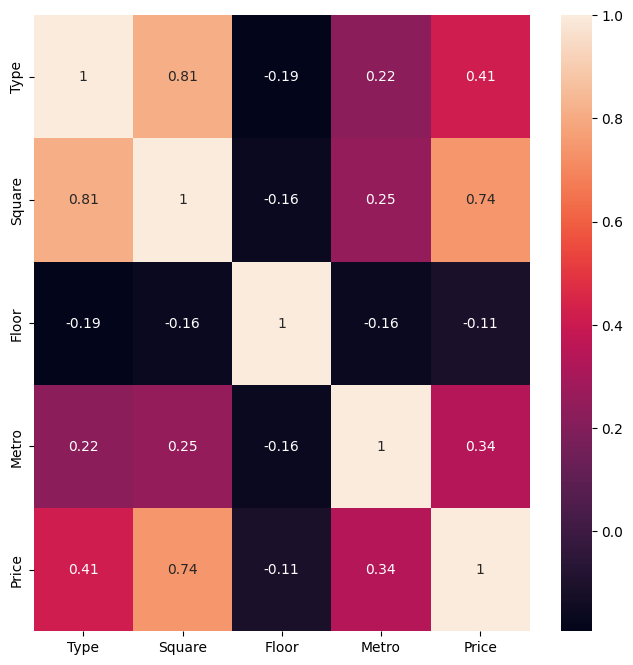

In [21]:
plt.figure(figsize=(8,8))
sns.heatmap(apartment_df.corr(), annot=True)

# Data Cleaning


In [106]:
apartment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6600 entries, 0 to 6599
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Type    6468 non-null   float64
 1   Square  6567 non-null   float64
 2   Floor   6600 non-null   int64  
 3   Metro   6585 non-null   float64
 4   Price   6556 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 257.9 KB


In [105]:
apartment_df.describe()

,Type,Square,Floor,Metro,Price
count,6468.000000,6567.000000,6600.000000,6585.000000,6.556000e+03
mean,1.144094,44.591768,9.555000,0.190129,7.724972e+06
std,0.870607,19.614868,5.308744,0.392433,1.041567e+07
min,0.000000,16.770000,1.000000,0.000000,2.500000e+06
25%,1.000000,32.530000,5.000000,0.000000,4.717174e+06
50%,1.000000,37.600000,9.000000,0.000000,5.698234e+06
75%,2.000000,55.610000,14.000000,0.000000,7.947608e+06
max,8.000000,521.400000,25.000000,1.000000,4.500000e+08


Поскольку пропуски данных имеются во всех признаках заполним NaN значения Type средним целым числом, для того, что бы в дальнейшем группировать и с большей точностью заполнять другие NaN.
Так же изменим Dtype 'Type' на целые числа

In [109]:
apartment_df['Type'] = apartment_df['Type'].fillna(1).astype('int64')
apartment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6600 entries, 0 to 6599
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Type    6600 non-null   int64  
 1   Square  6567 non-null   float64
 2   Floor   6600 non-null   int64  
 3   Metro   6585 non-null   float64
 4   Price   6556 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 257.9 KB


In [111]:
grouped = apartment_df.groupby('Type')
apartment_df['Square'] = apartment_df.groupby('Type')['Square'].transform(lambda x: x.fillna(x.mean()))
apartment_df['Metro'] = apartment_df['Metro'].fillna(0).astype('int64')
apartment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6600 entries, 0 to 6599
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Type    6600 non-null   int64  
 1   Square  6600 non-null   float64
 2   Floor   6600 non-null   int64  
 3   Metro   6600 non-null   int64  
 4   Price   6556 non-null   float64
dtypes: float64(2), int64(3)
memory usage: 257.9 KB


In [112]:
apartment_df.describe()

,Type,Square,Floor,Metro,Price
count,6600.000000,6600.000000,6600.000000,6600.000000,6.556000e+03
mean,1.141212,44.558726,9.555000,0.189697,7.724972e+06
std,0.862092,19.571314,5.308744,0.392091,1.041567e+07
min,0.000000,16.770000,1.000000,0.000000,2.500000e+06
25%,1.000000,32.560000,5.000000,0.000000,4.717174e+06
50%,1.000000,37.630000,9.000000,0.000000,5.698234e+06
75%,2.000000,55.425000,14.000000,0.000000,7.947608e+06
max,8.000000,521.400000,25.000000,1.000000,4.500000e+08
